In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

py.init_notebook_mode(connected=True)

In [112]:
df = pd.read_csv(r'C:\Users\samue\OneDrive\Documents\Python Scripts\Garmin_Step_Count\Data\May212019-Jan052020\WELLNESS_TOTAL_STEPS.csv',skiprows=[0])

In [113]:
count = 31
for x in range(1, count+1):
    file_num = (x)
    temp = pd.read_csv(fr'C:\Users\samue\OneDrive\Documents\Python Scripts\Garmin_Step_Count\Data\May212019-Jan052020\WELLNESS_TOTAL_STEPS ({file_num}).csv',skiprows=[0])
    df = pd.concat([temp, df], ignore_index=True)

In [114]:
rng = pd.date_range(end='2020-01-05', periods=212, freq='D').sort_values(ascending=True)

df.insert(0,'date',rng)

df.to_csv(r'C:\Users\samue\OneDrive\Documents\Python Scripts\Garmin_Step_Count\Data\Cleaned_data\clean.csv')

In [115]:
def consecutive(count,col):
    """Returns a series of ints that indicates if there have been consecutive negative
    or positive numbers in a row before and including the current item, 1 for yes and 0 for no.
    
    Parameters
    ----------
    count : int
        The number of consecutive to produce a true
    col : pandas series
        The column for comparison
    """
    
    bool_col = col.apply(lambda x: 1 if x >= 0 else 0)
    result = bool_col
    
    for x in range(1, count):
        result = result + bool_col[x:].reset_index(drop=True)
    
    result = result[:-count+1]
    result.index += count-1
    
    result = result.apply(lambda x: 1 if x == count or x == 0 else 0)
    
    return(result)

In [116]:
df['Difference'] = df['Actual'] - df['Goal']
df['Goal_Delta'] = df['Goal'][1:].reset_index(drop=True) - df['Goal']

df['Goal_Diff_Perc'] = df['Actual'] / df['Goal'] * 100

df['Diff_Scale'] = df['Difference'] / df['Goal']
df['Diff_Scale_Norm'] = (df['Diff_Scale']-df['Diff_Scale'].min()) / (df['Diff_Scale'].max()-df['Diff_Scale'].min())

for x in range(2,5):
    df[f'Consec {x}'] = consecutive(x,df['Goal_Delta'])

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 12 columns):
date               212 non-null datetime64[ns]
Unnamed: 0         212 non-null object
Actual             212 non-null object
Goal               212 non-null object
Difference         212 non-null object
Goal_Delta         211 non-null object
Goal_Diff_Perc     212 non-null object
Diff_Scale         212 non-null object
Diff_Scale_Norm    212 non-null object
Consec 2           211 non-null float64
Consec 3           210 non-null float64
Consec 4           209 non-null float64
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 20.0+ KB


In [118]:
df[["Actual","Goal","Difference","Goal_Delta","Goal_Diff_Perc"]] = df[["Actual","Goal","Difference","Goal_Delta","Goal_Diff_Perc"]].apply(pd.to_numeric)

In [119]:
# plt.plot(df['Difference']);
# fig = go.Figure(
#     data=[go.Scatter(y=df['Goal_Delta'], x=df['Goal_Diff_Perc'])]
# )
# fig.show()

fig = px.scatter(df,x='Goal_Delta', y='Difference', color="Consec 2",size='Diff_Scale_Norm')
fig.show()

ValueError: 
    Invalid value of type 'pandas.core.series.Series' received for the 'size' property of scatter.marker
        Received value: 0       0.553097
1       0.338558
2       0.196791
3        0.33277
4       0.420303
5       0.153238
6       0.194355
7       0.052126
8       0.673152
9       0.252902
10      0.413394
11      0.396041
12      0.181682
13      0.331755
14       0.92016
15      0.417816
16      0.357313
17      0.716638
18      0.334304
19       0.24416
20      0.486423
21      0.422551
22      0.702641
23       0.16844
24      0.563528
25      0.235511
26      0.238273
27      0.162981
28      0.840447
29       0.39157
         ...    
182     0.903037
183     0.471257
184     0.354644
185      0.45911
186     0.230782
187     0.189219
188     0.266237
189     0.619894
190     0.434721
191    0.0103059
192    0.0866893
193     0.295507
194     0.261145
195     0.173351
196            1
197     0.589801
198      0.49516
199     0.303822
200     0.359111
201     0.331286
202     0.334222
203    0.0494125
204     0.432282
205     0.361546
206     0.113436
207    0.0554164
208     0.437275
209     0.316281
210     0.272033
211            0
Name: Diff_Scale_Norm, Length: 212, dtype: object

    The 'size' property is a number and may be specified as:
      - An int or float in the interval [0, inf]
      - A tuple, list, or one-dimensional numpy array of the above

In [120]:
fig = px.scatter(df,x='Difference', y='Goal_Delta', size="Goal_Diff_Perc", color="Consec 3")
fig.show()

We see by the color difference in the two previous graphs that the number of consecutive positives or negatives that match the current data point doesn't mater after just 2.  I will create the first case, negative difference and consecutive.

In [121]:
# Identify the calculation
df_neg = df[['Actual', 'Goal','Difference','Goal_Delta','Goal_Diff_Perc','Consec 2']].copy()

df_neg = df_neg[(df_neg['Consec 2']==1) & (df_neg['Difference']<0)]

In [122]:
df_neg['Estimate'] = df_neg['Difference'] / df_neg['Goal_Delta']

In [123]:
df_neg['Estimate']

6       7.812821
7      16.970270
26      3.301316
27      9.714894
31      2.891667
37      5.534694
38     15.248936
41     11.311111
48      6.065957
52     12.682609
53      6.154545
59     13.578723
60      2.970000
61      8.100000
72      2.891228
73      9.491489
74      3.046154
78      2.891429
81      2.903333
88      2.992857
92      2.927778
101     2.828571
102     5.250000
103     9.436170
108    11.823404
109     6.288636
110    11.992857
113    16.365854
114     8.207692
119     9.610256
         ...    
126    15.178378
131         -inf
133     8.907895
134     3.250000
135     4.100000
136     2.940000
137     2.854545
138     5.861290
142     4.786667
152     3.547368
153     2.882353
154     6.871429
155     2.356911
156     3.137500
157     3.030769
164     4.750000
171         -inf
173     5.426471
174     5.948485
175     8.335484
178     2.919048
181     6.283333
187     8.197059
188     3.160606
191         -inf
193     2.966667
194     3.509091
195     9.2129

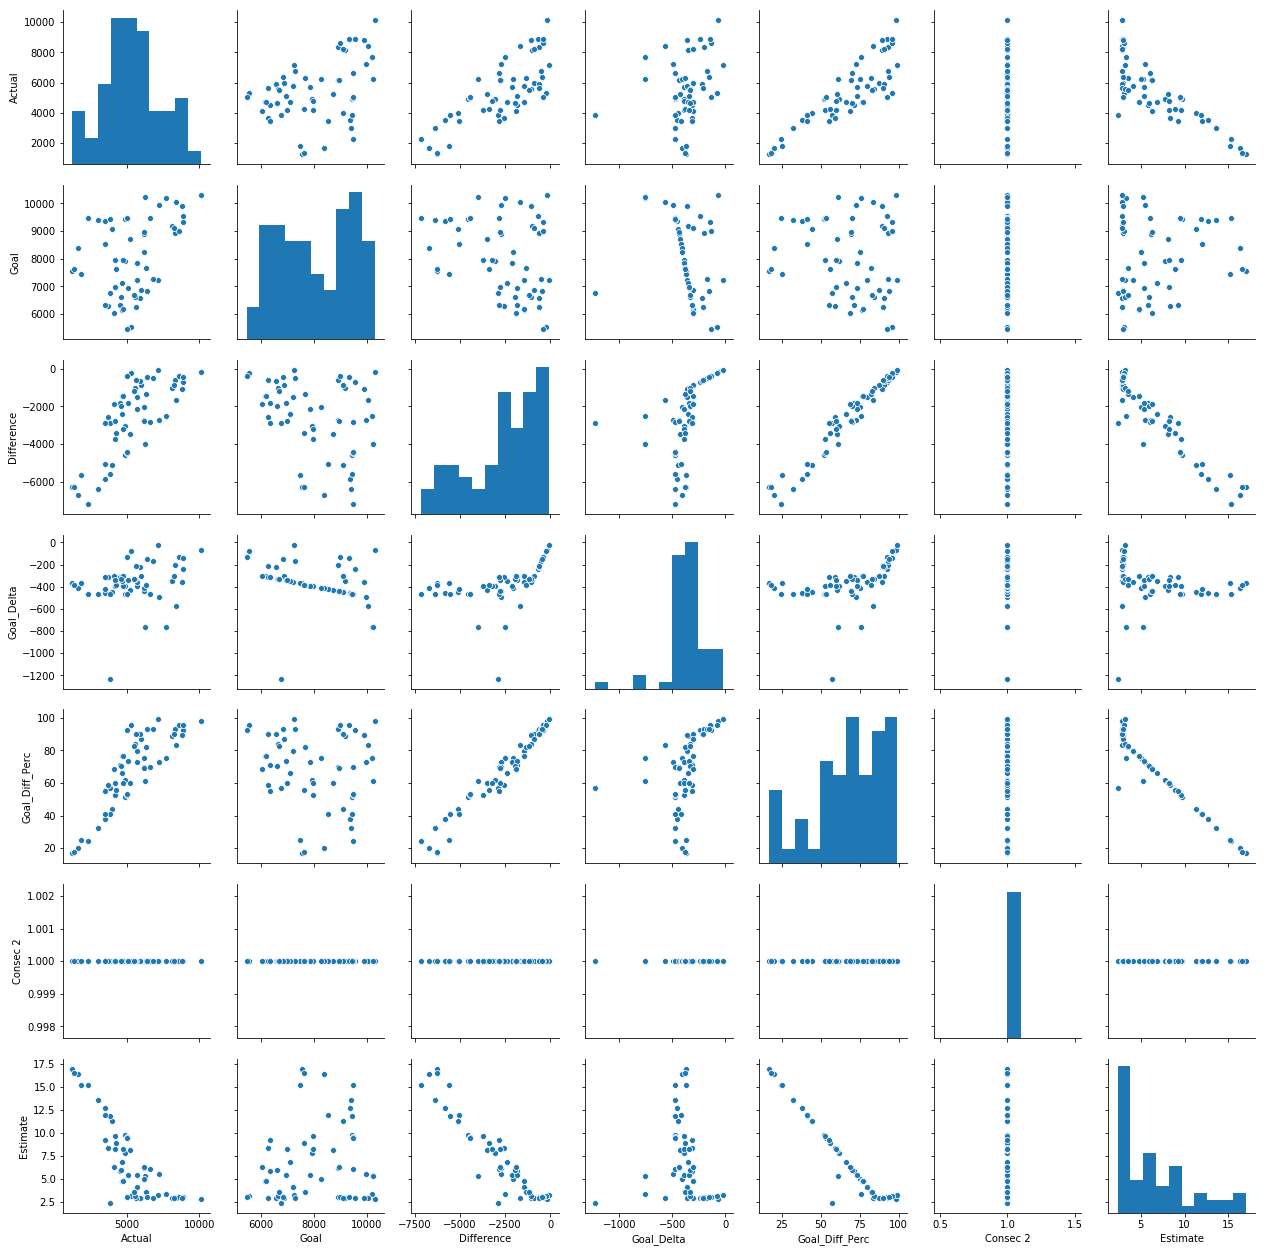

In [124]:

# Create the default pairplot
sns.pairplot(df_neg.replace([np.inf, -np.inf], np.nan).dropna())

Looking at the previous graph Goal_Diff_Perc vs Goal Delta it would seem that the goal delta has a linear relationship with this variable until the Goal_Diff_Perc drops bellow roughly 85% then it stays around 400 with some variation.

What is that variation around 400?

In [125]:
fig = px.scatter(df_neg,x='Goal_Diff_Perc', y='Goal_Delta',color='Goal')
fig.show()

By plotting Goal_Diff_Perc by Goal_Delta I simply put in different variables until I found one that gave the relationship I was looking for, which was a color gradiant in the y axis.  This should give me my variance after Goal_Diff_Perc has been accounted for.
Unfortunately there isn't enough data around 85% to clearly distinguish the cut off so I will make it 85% for now.

Lets break it down even further by filtering out 

In [126]:
df_neg['Goal_Delta'].unique()

array([ -390.,  -370.,  -760.,  -470.,  -240.,  -490.,  -450.,  -460.,
        -440.,  -200.,  -430.,  -570.,  -130.,  -350.,  -300.,  -140.,
        -360.,   -70.,  -420.,  -410.,     0.,  -380.,   -20.,  -220.,
        -310.,  -170., -1230.,   -80.,  -340.,  -330.,  -210.,  -150.,
          nan])

In [127]:
# Find max and min of each unique Goal Delta to see if they overlap and create our barriers
min_max = {}
for x in np.sort(df_neg['Goal_Delta'].unique()):
    min_max[f'{x}'] = [df_neg[(df_neg['Goal_Delta']==x) & (df_neg['Goal_Diff_Perc']< 85)]['Goal'].min(),
    df_neg[(df_neg['Goal_Delta']==x) & (df_neg['Goal_Diff_Perc']< 85)]['Goal'].max(),
    df_neg[(df_neg['Goal_Delta']==x) & (df_neg['Goal_Diff_Perc']< 85)]['Goal'].max() - df_neg[(df_neg['Goal_Delta']==x) & (df_neg['Goal_Diff_Perc']< 85)]['Goal'].min()]

In [128]:
min_max

{'-1230.0': [6760, 6760, 0],
 '-760.0': [10210, 10230, 20],
 '-570.0': [10040, 10040, 0],
 '-490.0': [9960, 9960, 0],
 '-470.0': [9390, 9480, 90],
 '-460.0': [9360, 9360, 0],
 '-450.0': [9080, 9080, 0],
 '-440.0': [8900, 8960, 60],
 '-430.0': [8720, 8720, 0],
 '-420.0': [8520, 8520, 0],
 '-410.0': [8260, 8380, 120],
 '-390.0': [7850, 7970, 120],
 '-380.0': [7620, 7660, 40],
 '-370.0': [7460, 7540, 80],
 '-360.0': [7220, 7220, 0],
 '-350.0': [7110, 7110, 0],
 '-340.0': [6940, 6960, 20],
 '-330.0': [6600, 6670, 70],
 '-310.0': [6270, 6340, 70],
 '-300.0': [6030, 6170, 140],
 '-240.0': [nan, nan, nan],
 '-220.0': [nan, nan, nan],
 '-210.0': [nan, nan, nan],
 '-200.0': [nan, nan, nan],
 '-170.0': [nan, nan, nan],
 '-150.0': [nan, nan, nan],
 '-140.0': [nan, nan, nan],
 '-130.0': [nan, nan, nan],
 '-80.0': [nan, nan, nan],
 '-70.0': [nan, nan, nan],
 '-20.0': [nan, nan, nan],
 '0.0': [7030, 7820, 790],
 'nan': [nan, nan, nan]}

In [129]:
min_max_data = [[float(x), ((min_max[x][0] + min_max[x][0]) / 2)] for x in list(min_max.keys()) if float(x) < -295 and float(x) > -1230]

We found the edges of the "Bins" from which we can sort.  Since I don't know the exact ones I will use the`

In [130]:
df_min_max = pd.DataFrame.from_records(min_max_data)

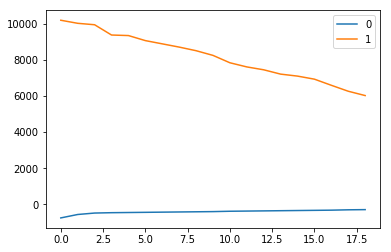

In [137]:
df_min_max.plot();

In [138]:
df_min_max

,0,1
0,-760.0,10210.0
1,-570.0,10040.0
2,-490.0,9960.0
3,-470.0,9390.0
4,-460.0,9360.0
5,-450.0,9080.0
6,-440.0,8900.0
7,-430.0,8720.0
8,-420.0,8520.0
9,-410.0,8260.0


There are skips such as -320 is missing.  Need to collect more data to see if that is missing just from my data set or if it is designed like that.

For now lets move on to the second part of the negative conescutive 